# Best Response

If two individuals are going to cooperate in an activity together, their individual time commitments are denoted as $S_1$ and $S_2$ hours respectively. In this instance, their profit is equivalent to:

$U_1 = S_1 + 2S_2 + S_1S_2 - S_1^2 ~~~~~~~~~~~~~~ 0.1 \le S_1 \le 3.1$  
$U_2 = 3S_2 + 3S_1 + S_1S_2 - S_2^2 ~~~~~~~~~~~~ 0.2 \le S_2 \le 3.2$

# Part 1

Execute the two cells below. The first graph displays the $U_1(S_1, S_2)$ graph for each value of $S_2$, while the second graph shows the $U_2(S_1, S_2)$ graph for each value of $S_1$. Additionally, please ensure that the maximum value for each curve is clearly indicated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils import *

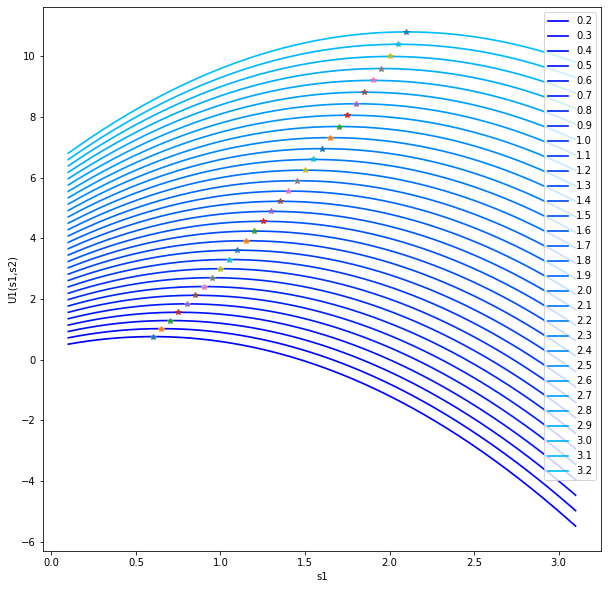

In [2]:
s1 = np.arange(s1_min, s1_max+0.01, 0.01)
s2 = np.arange(s2_min, s2_max+0.1, 0.1)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('s1')
ax.set_ylabel('U1(s1,s2)')

for i, _ in enumerate(s2):
    ax.plot(s1, U1(s1, s2[i]), color=[0, i/40, 1], linewidth=1.7)
ax.legend(s2.astype('|S5').astype(float), loc='best')

for i, _ in enumerate(s2):
    max_index = np.argmax(U1(s1, s2[i]))
    ax.plot(s1[max_index], U1(s1[max_index], s2[i]), '*')

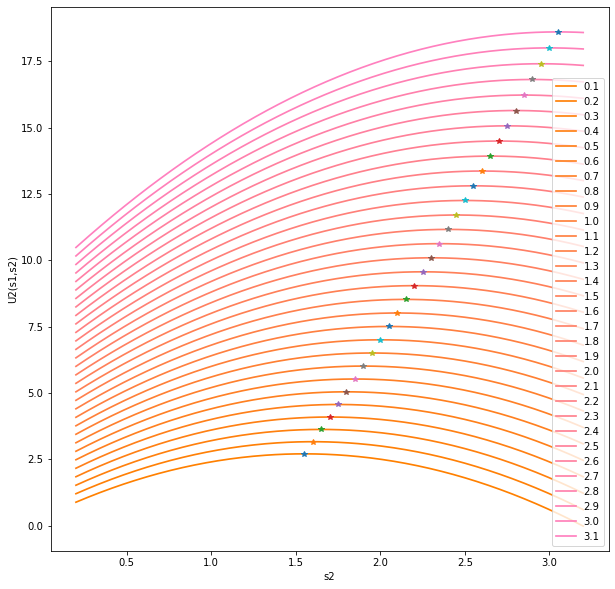

In [3]:
s1 = np.arange(s1_min, s1_max+0.1, 0.1)
s2 = np.arange(s2_min, s2_max+0.01, 0.01)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('s2')
ax.set_ylabel('U2(s1,s2)')    
for i,_ in enumerate(s1):
    ax.plot(s2, U2(s1[i], s2), color=[1, 0.5, i/40], linewidth=1.7)
    
ax.legend(s1.astype('|S5').astype(float), loc='best')

for i,_ in enumerate(s1):
    max_index = np.argmax(U2(s1[i], s2))
    ax.plot(s2[max_index], U2(s1[i], s2[max_index]), '*')

Each player strives to identify the "best response" to the other player, investing an equal amount of time. In this scenario, strategies $S_1$ and $S_2$ are continuous variables. The first player selects his/her optimal strategy by identifying an $S_1$ value that maximizes $U_1$, under the assumption that the second player will invest a specific amount of time in determining $S_2$. Through this approach, each player effectively discovers their "best response", relative to the opposing party's $S_2$ strategy.

# Part 2

Considering the concavity of the two profit functions (as shown above), to maximize $U_1$ with respect to $S_1$ (assuming $S_2$ is fixed), it is sufficient to differentiate $U_1$ with respect to $S_1$. Solving the resulting equation in terms of $S_1$ yields the best strategy for the first player.

$$\frac{\partial U_1}{\partial S_1} = 0 \implies S_1^* = BR_1(S_2)$$

This resulting strategy can be expressed as a function of $S_2$, denoted as $S_1^* = BR_1(S_2)$.  
Similarly, one can find $S_2^* = BR_2(S_1)$ in a corresponding manner.

$$\frac{\partial U_2}{\partial S_2} = 0 \implies S_2^* = BR_2(S_1)$$  
  
Now, solve these equations and write them into the below cell.  
  
For exmaple if $S_1^* = BR_1(S_2) = 2S_2 + 4.5$, write:
```
def BR1(s2):
    return 2*s2 + 4.5
```

In [4]:
def BR1(s2):
    # YOUR CODE HERE
    res = (s2+1)/2
    return res

def BR2(s1):
    # YOUR CODE HERE
    res = (s1+3)/2
    return res

Execute the two cells below.

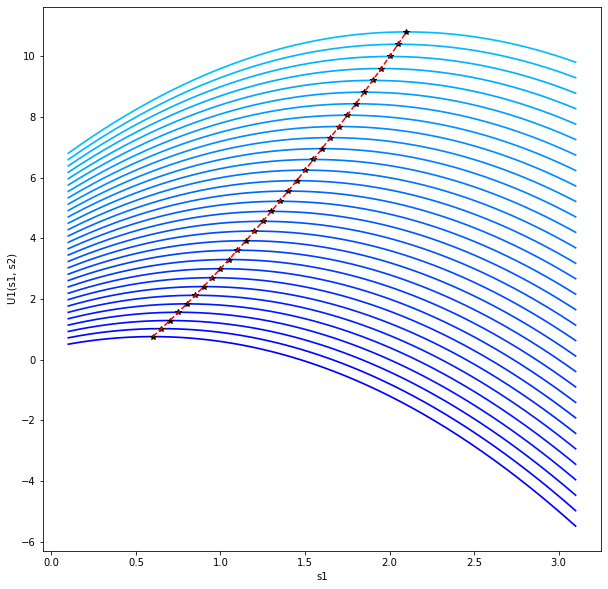

In [5]:
s1 = np.arange(s1_min, s1_max+0.01, 0.01)
s2 = np.arange(s2_min, s2_max+0.1, 0.1)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('s1')
ax.set_ylabel('U1(s1, s2)')

for i,_ in enumerate(s2):
    ax.plot(s1, U1(s1, s2[i]), color=[0, i/40, 1], linewidth=1.7)
    max_index = np.argmax(U1(s1, s2[i]))
    ax.plot(s1[max_index], U1(s1[max_index], s2[i]), '*', color='black')

ax.plot(BR1(s2), U1(BR1(s2), s2), '--', color='red')
plt.show()

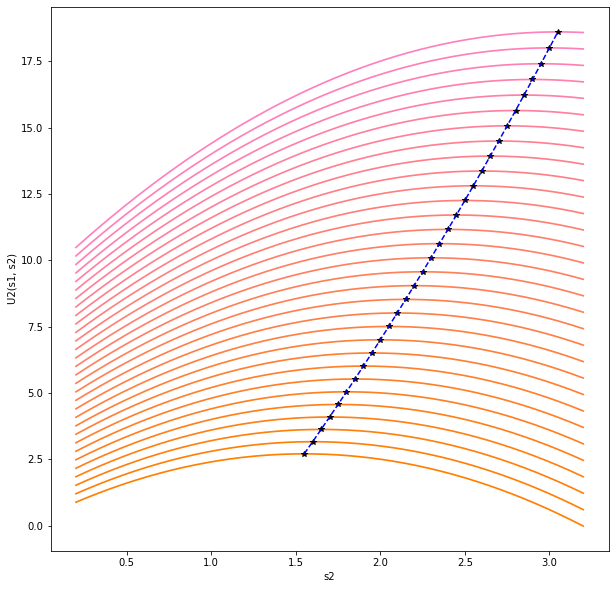

In [6]:
s1 = np.arange(s1_min, s1_max+0.1, 0.1)
s2 = np.arange(s2_min, s2_max+0.01, 0.01)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('s2')
ax.set_ylabel('U2(s1, s2)')

for i,_ in enumerate(s1):
    ax.plot(s2, U2(s1[i], s2), color=[1, 0.5, i/40], linewidth=1.7)
    max_index = np.argmax(U2(s1[i], s2))
    ax.plot(s2[max_index], U2(s1[i], s2[max_index]), '*', color='black')

ax.plot(BR2(s1), U2(s1, BR2(s1)), '--', color='blue')
plt.show()

If the expressions related to "best response" (BR) are calculated correctly, the curve of $U_1(BR_1(S_2), S_2)$ points should coincide with the maximum points of $U_1(S_1, S_2)$ in the first figure. Similarly, the curve of $U_2(BR_2(S_1), S_1)$ points should coincide with the maximum points of $U_2(S_1, S_2)$ in the second figure.  
  
Execute the cell below to view the graphs of the "best response", both individually and in combination.

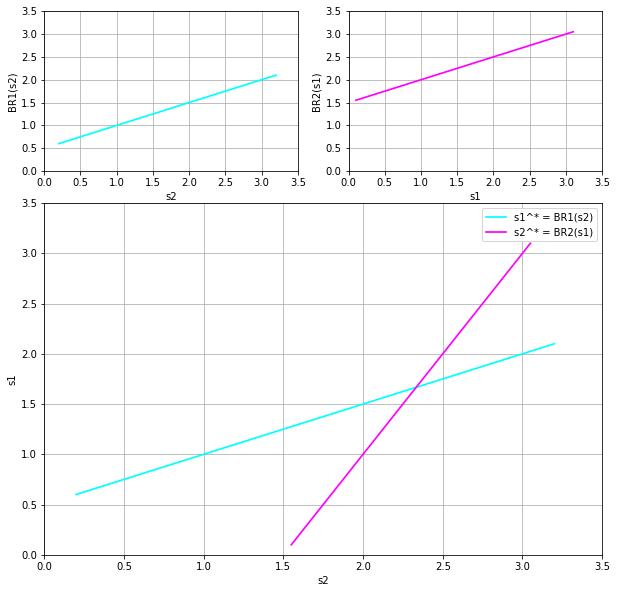

In [7]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot([s2_min, s2_max], [BR1(s2_min), BR1(s2_max)], color='cyan', linewidth=1.7)
ax0.set_xlim([0, 3.5])
ax0.set_ylim([0, 3.5])
ax0.grid(True)
ax0.set_xlabel('s2')
ax0.set_ylabel('BR1(s2)')

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot([s1_min, s1_max], [BR2(s1_min), BR2(s1_max)], color='magenta', linewidth=1.7)
ax1.set_xlim([0, 3.5])
ax1.set_ylim([0, 3.5])
ax1.grid(True)
ax1.set_xlabel('s1')
ax1.set_ylabel('BR2(s1)')

ax2 = fig.add_subplot(gs[1:, :])
ax2.plot([s2_min, s2_max], [BR1(s2_min), BR1(s2_max)], color='cyan', linewidth=1.7)
ax2.plot([BR2(s1_min), BR2(s1_max)], [s1_min, s1_max], color='magenta', linewidth=1.7)
ax2.set_xlim([0, 3.5])
ax2.set_ylim([0, 3.5])
ax2.grid(True)
ax2.legend(['s1^* = BR1(s2)', 's2^* = BR2(s1)'])
ax2.set_xlabel('s2')
ax2.set_ylabel('s1')

plt.show()

# Part 3

We now seek to analyze the process of reaching the equilibrium point in this scenario. Imagine yourself in the position of the first player. Following the assumption of rationality, you wouldn't choose strategies that don't lead to maximum profit. Therefore, even within your chosen strategy interval $0.1 \le S_1 \le 3.1$, you would use the smaller interval shared by $0.1 \le S_1 \le 3.1$ and $min(BR_1(S_2)) \le S_1 \le max(BR_1(S_2))$ to select your strategy.  
  
From the figure above, identify the $min(BR_1(S_2))$ and $max(BR_1(S_2))$ values. Then, based on the aforementioned explanation, determine the shared interval of $0.1 \le S_1 \le 3.1$ and $min(BR_1(S_2)) \le S_1 \le max(BR_1(S_2))$ and label it as $[MIN(S_1), MAX(S_1)]$.

Now, place yourself in the position of the second player. Employing the same logic, find the new interval $[MIN(S_1), MAX(S_1)]$ to choose your strategy. It's apparent that this interval will also align with the shared interval of $0.2 \le S_2 \le 3.2$ and $min(BR_2(S_1)) \le S_2 \le max(BR_2(S_1))$.

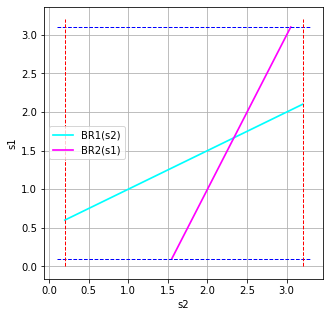

In [8]:
plot_graphs(s1_min, s1_max, s2_min, s2_max, BR1, BR2)

# Part 4

If this logical thinking process continues, what strategy profile do you anticipate the two players will ultimately converge on, and where will it appear on the two charts?  
Execute the following cell to check this question.

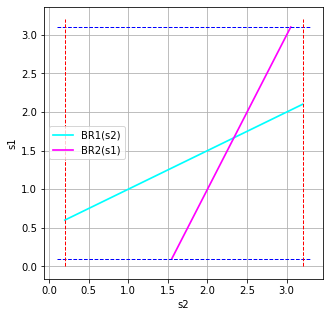

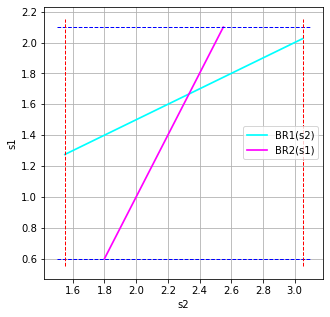

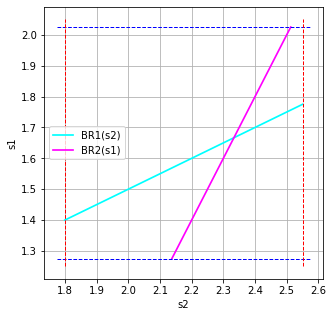

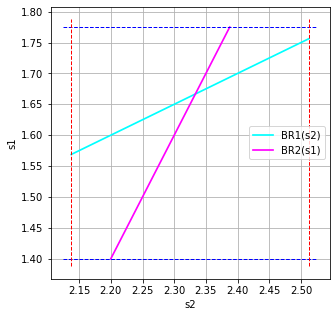

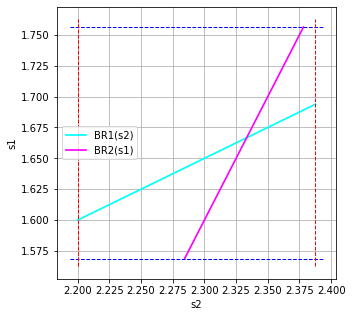

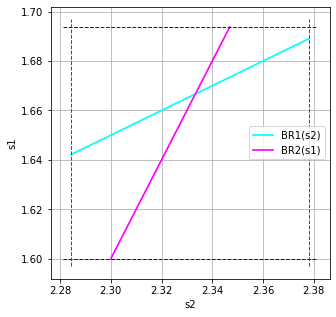

In [9]:
s1_min, s1_max = 0.1, 3.1
s2_min, s2_max = 0.2, 3.2
plot_graphs(s1_min, s1_max, s2_min, s2_max, BR1, BR2)

while (s1_max - s1_min) > 0.1:
    plt.pause(0.5)
    s1_max_temp, s1_min_temp = s1_max, s1_min
    s1_max = min(s1_max, BR1(s2_max))
    s1_min = max(s1_min, BR1(s2_min))
    s2_max = min(s2_max, BR2(s1_max_temp))
    s2_min = max(s2_min, BR2(s1_min_temp))
    plot_graphs(s1_min, s1_max, s2_min, s2_max, BR1, BR2)